In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Test.csv')

#### Pre Processing

In [12]:
print('Shape of the data is: ')
print(f'Rows: {df.shape[0]}, columns: {df.shape[1]}')

print('info about the dataset: ')
print(df.info())

print("Missing or null values: ")
print(df.isnull().sum())

Shape of the data is: 
Rows: 2627, columns: 10
info about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None
Missing or null values: 
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score

#### Processing / Data cleaning

In [ ]:
df_cleaned = df.copy()

df_cleaned.drop(columns="ID", inplace=True)

df_cleaned["Ever_Married"] = df_cleaned["Ever_Married"].fillna(
    df_cleaned["Age"].apply(lambda x: "No" if x < 21 else "Unknown")
)

df_cleaned["Graduated"] = df_cleaned["Graduated"].fillna(
    df_cleaned["Age"].apply(lambda x: "No" if x < 21 else "Unknown")
)

df_cleaned["Profession"] = df["Profession"].fillna("Unknown")

df_cleaned["Work_Experience"] = df_cleaned["Work_Experience"].fillna(
    df_cleaned["Work_Experience"].median()
)

df_cleaned["Family_Size"] = df_cleaned["Family_Size"].fillna(
    df_cleaned["Family_Size"].median()
)

df_cleaned["Var_1"] = df_cleaned["Var_1"].fillna("Unknown")

#### Encoding

In [ ]:
df_encoded = df_cleaned.copy()
le = LabelEncoder()
df_encoded["Gender"] = le.fit_transform(
    df_encoded["Gender"]
)  # 0 for female, 1 for male

categorical_cols = [
    "Ever_Married",
    "Graduated",
    "Profession",
    "Spending_Score",
    "Var_1",
]
ohe = OneHotEncoder()
hot_encoded = ohe.fit_transform(df_encoded[categorical_cols])

encoded_df = pd.DataFrame(
    hot_encoded.toarray(),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=df_encoded.index,
)
df_encoded = pd.concat([df_encoded.drop(columns=categorical_cols), encoded_df], axis=1)

#### Features Scaling

In [62]:
df_scaled = df_encoded.copy()
numeric_cols = ['Age','Work_Experience','Family_Size']
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

#### Customer Segmentation: KMeans

In [68]:
df_clustered = df_encoded.copy()
X = df_clustered.drop(columns=['Group'], errors='ignore') 
model = KMeans(n_clusters=3,random_state=42)
df_clustered['Group'] = model.fit_predict(X)
df_clustered.head()

,Gender,Age,Work_Experience,Family_Size,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Graduated_No,Graduated_Unknown,Graduated_Yes,...,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_Unknown,Group
0,0,36,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1,37,8.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0,69,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,1,59,11.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,0,19,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
cluster_summary = df_clustered.groupby('Group').mean()
cluster_summary

,Gender,Age,Work_Experience,Family_Size,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Graduated_No,Graduated_Unknown,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_Unknown
Group,,,,,,,,,,,,,,,,,,,,,
0,0.528558,45.436990,2.512239,2.634633,0.251133,0.017226,0.731641,0.241160,0.004533,0.754306,...,0.132366,0.485041,0.013599,0.048957,0.097915,0.150499,0.005440,0.652765,0.019946,0.010879
1,0.538232,27.657398,2.827210,3.255214,0.753724,0.017875,0.228401,0.566038,0.006951,0.427011,...,0.036743,0.872890,0.013903,0.073486,0.126117,0.178749,0.020854,0.541212,0.032771,0.012910
2,0.578337,70.986460,1.295938,2.214700,0.044487,0.021277,0.934236,0.323017,0.019342,0.657640,...,0.392650,0.390716,0.009671,0.025145,0.061896,0.077369,0.003868,0.787234,0.021277,0.013540


### Visulazition

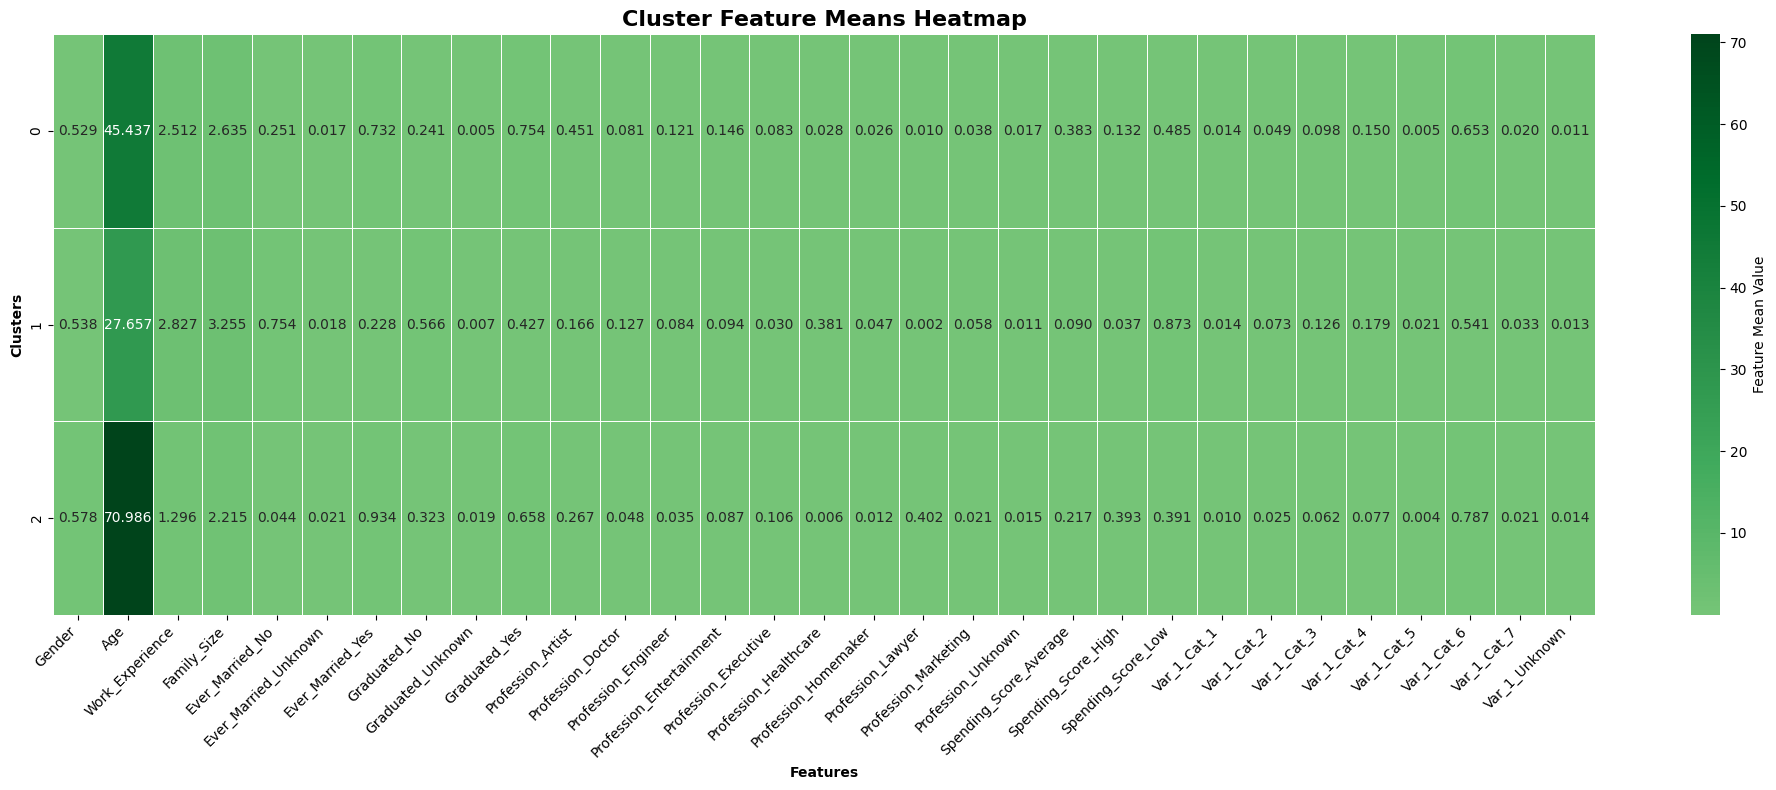

In [86]:
plt.figure(figsize=(20, 8))
sns.heatmap(
    df_clustered.groupby('Group').mean(),
    annot=True,
    fmt=".3f",
    cmap='Greens',
    center=0.5,
    linewidths=0.5,
    cbar_kws={'label': 'Feature Mean Value'}
)
plt.title('Cluster Feature Means Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Clusters', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()